# Importing Libraries 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Importing Data

In [2]:
Time_Series = pd.read_csv("C:/Users/Vaibhav Banga/Downloads/AirPassengers.csv")

# EDA - Exploratory Data Analysis

In [3]:
Time_Series.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
Time_Series.tail()

,Month,#Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [5]:
Time_Series.dtypes

Month          object
#Passengers     int64
dtype: object

In [6]:
Time_Series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [7]:
Time_Series.describe()

,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


# Data Indexing 

In [8]:
#Convert 'object' Data_type to Date_Time Datatype
Dateparser = lambda Date : pd.datetime.strptime(Date,'%Y-%m')


In [9]:
#MAking Month as Index Column and Initializing it 
Time_Series = pd.read_csv("C:/Users/Vaibhav Banga/Downloads/AirPassengers.csv", date_parser = Dateparser ,index_col= 'Month' , parse_dates=['Month'])

C:\Users\Vaibhav Banga\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


In [10]:
Time_Series.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [11]:
Time_Series.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   #Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [12]:
Time_Series.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

# Visualizing The Dataset

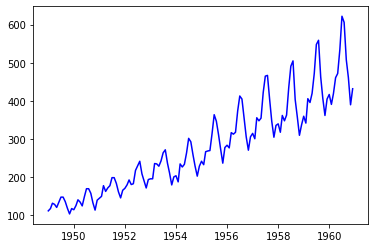

In [13]:
#Plot Date
plt.plot(Time_Series['#Passengers'], color = 'Blue')

# Identifying Trend - Visualizing Way

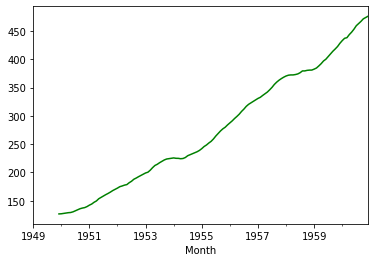

In [14]:
#To Identify The Trend - By Smoothening `
Time_Series['#Passengers'].rolling(12).mean().plot(color = 'Green')
#Upward Trend

# Testing For The Stationary Dataset - Scientific Way


In [15]:
#Test Name/Method Name - Augmented Dicky fuller Test
#H0 : if p>0.05 then it is a non-stationary time series Dataset
from statsmodels.tsa.stattools import adfuller
#adfuller doesn't work with the Pandas so we have to convert it to the Numpy
Time_Series['#Passengers'].values

array([112, 118, 132, 129, 121, 135, 148, 148, 136, 119, 104, 118, 115,
       126, 141, 135, 125, 149, 170, 170, 158, 133, 114, 140, 145, 150,
       178, 163, 172, 178, 199, 199, 184, 162, 146, 166, 171, 180, 193,
       181, 183, 218, 230, 242, 209, 191, 172, 194, 196, 196, 236, 235,
       229, 243, 264, 272, 237, 211, 180, 201, 204, 188, 235, 227, 234,
       264, 302, 293, 259, 229, 203, 229, 242, 233, 267, 269, 270, 315,
       364, 347, 312, 274, 237, 278, 284, 277, 317, 313, 318, 374, 413,
       405, 355, 306, 271, 306, 315, 301, 356, 348, 355, 422, 465, 467,
       404, 347, 305, 336, 340, 318, 362, 348, 363, 435, 491, 505, 404,
       359, 310, 337, 360, 342, 406, 396, 420, 472, 548, 559, 463, 407,
       362, 405, 417, 391, 419, 461, 472, 535, 622, 606, 508, 461, 390,
       432], dtype=int64)

In [16]:
result = adfuller(Time_Series['#Passengers'].values)

In [17]:
result
#result[1] = p Value

(0.8153688792060543,
 0.9918802434376411,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [18]:
p_value = result[1]
p_value

0.9918802434376411

# Convert To Stationary Dataset 

In [19]:
#1 Taking log of the Dataset
log = np.log(Time_Series['#Passengers'].values)
log

array([4.71849887, 4.77068462, 4.88280192, 4.8598124 , 4.79579055,
       4.90527478, 4.99721227, 4.99721227, 4.91265489, 4.77912349,
       4.6443909 , 4.77068462, 4.74493213, 4.83628191, 4.94875989,
       4.90527478, 4.82831374, 5.00394631, 5.13579844, 5.13579844,
       5.06259503, 4.89034913, 4.73619845, 4.94164242, 4.97673374,
       5.01063529, 5.18178355, 5.0937502 , 5.14749448, 5.18178355,
       5.29330482, 5.29330482, 5.21493576, 5.08759634, 4.98360662,
       5.11198779, 5.14166356, 5.19295685, 5.26269019, 5.19849703,
       5.20948615, 5.38449506, 5.43807931, 5.48893773, 5.34233425,
       5.25227343, 5.14749448, 5.26785816, 5.27811466, 5.27811466,
       5.46383181, 5.45958551, 5.433722  , 5.49306144, 5.5759491 ,
       5.60580207, 5.46806014, 5.35185813, 5.19295685, 5.30330491,
       5.31811999, 5.23644196, 5.45958551, 5.42495002, 5.45532112,
       5.5759491 , 5.71042702, 5.68017261, 5.55682806, 5.433722  ,
       5.31320598, 5.433722  , 5.48893773, 5.45103845, 5.58724

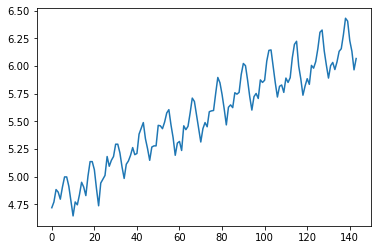

In [20]:
plt.plot(log)

In [21]:
#2 To Take the Square Root of the Dataset
sqrt = np.sqrt(Time_Series['#Passengers'].values)
sqrt

array([10.58300524, 10.86278049, 11.48912529, 11.35781669, 11.        ,
       11.61895004, 12.16552506, 12.16552506, 11.66190379, 10.90871211,
       10.19803903, 10.86278049, 10.72380529, 11.22497216, 11.87434209,
       11.61895004, 11.18033989, 12.20655562, 13.03840481, 13.03840481,
       12.56980509, 11.53256259, 10.67707825, 11.83215957, 12.04159458,
       12.24744871, 13.34166406, 12.76714533, 13.11487705, 13.34166406,
       14.10673598, 14.10673598, 13.56465997, 12.72792206, 12.08304597,
       12.88409873, 13.07669683, 13.41640786, 13.89244399, 13.45362405,
       13.52774926, 14.76482306, 15.16575089, 15.55634919, 14.45683229,
       13.82027496, 13.11487705, 13.92838828, 14.        , 14.        ,
       15.3622915 , 15.32970972, 15.13274595, 15.58845727, 16.24807681,
       16.4924225 , 15.39480432, 14.52583905, 13.41640786, 14.17744688,
       14.28285686, 13.7113092 , 15.32970972, 15.06651917, 15.29705854,
       16.24807681, 17.3781472 , 17.11724277, 16.09347694, 15.13

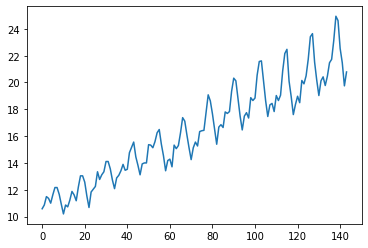

In [22]:
plt.plot(sqrt)

In [23]:
#3 First Order Differencing
Time_Series['#Passengers'].values

array([112, 118, 132, 129, 121, 135, 148, 148, 136, 119, 104, 118, 115,
       126, 141, 135, 125, 149, 170, 170, 158, 133, 114, 140, 145, 150,
       178, 163, 172, 178, 199, 199, 184, 162, 146, 166, 171, 180, 193,
       181, 183, 218, 230, 242, 209, 191, 172, 194, 196, 196, 236, 235,
       229, 243, 264, 272, 237, 211, 180, 201, 204, 188, 235, 227, 234,
       264, 302, 293, 259, 229, 203, 229, 242, 233, 267, 269, 270, 315,
       364, 347, 312, 274, 237, 278, 284, 277, 317, 313, 318, 374, 413,
       405, 355, 306, 271, 306, 315, 301, 356, 348, 355, 422, 465, 467,
       404, 347, 305, 336, 340, 318, 362, 348, 363, 435, 491, 505, 404,
       359, 310, 337, 360, 342, 406, 396, 420, 472, 548, 559, 463, 407,
       362, 405, 417, 391, 419, 461, 472, 535, 622, 606, 508, 461, 390,
       432], dtype=int64)

In [24]:
np.diff(Time_Series['#Passengers'].values)

array([   6,   14,   -3,   -8,   14,   13,    0,  -12,  -17,  -15,   14,
         -3,   11,   15,   -6,  -10,   24,   21,    0,  -12,  -25,  -19,
         26,    5,    5,   28,  -15,    9,    6,   21,    0,  -15,  -22,
        -16,   20,    5,    9,   13,  -12,    2,   35,   12,   12,  -33,
        -18,  -19,   22,    2,    0,   40,   -1,   -6,   14,   21,    8,
        -35,  -26,  -31,   21,    3,  -16,   47,   -8,    7,   30,   38,
         -9,  -34,  -30,  -26,   26,   13,   -9,   34,    2,    1,   45,
         49,  -17,  -35,  -38,  -37,   41,    6,   -7,   40,   -4,    5,
         56,   39,   -8,  -50,  -49,  -35,   35,    9,  -14,   55,   -8,
          7,   67,   43,    2,  -63,  -57,  -42,   31,    4,  -22,   44,
        -14,   15,   72,   56,   14, -101,  -45,  -49,   27,   23,  -18,
         64,  -10,   24,   52,   76,   11,  -96,  -56,  -45,   43,   12,
        -26,   28,   42,   11,   63,   87,  -16,  -98,  -47,  -71,   42],
      dtype=int64)

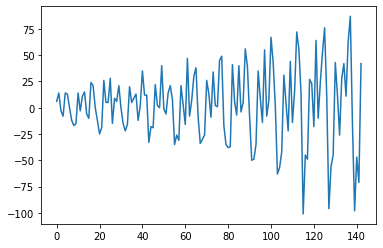

In [25]:
plt.plot(np.diff(Time_Series['#Passengers'].values))
#Now it is Stationary 

In [26]:
from statsmodels.tsa.stattools import adfuller
result_1 = adfuller(np.diff(Time_Series['#Passengers'].values))
result_1

(-2.8292668241700034,
 0.054213290283824954,
 12,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 988.5069317854084)

In [27]:
P_value1 = result_1[1]
P_value1
# It is quite Close but non-stationary

0.054213290283824954

# Modelling or Forecasting

In [28]:
#1 Simple Exponential Smoothing
from statsmodels.tsa.api import SimpleExpSmoothing
Simple = SimpleExpSmoothing(Time_Series).fit(smoothing_level = 0.2,optimized = False)

C:\Users\Vaibhav Banga\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


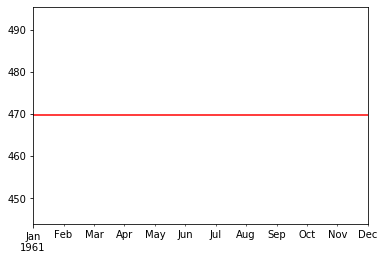

In [29]:
forecast = Simple.forecast(12)
forecast.plot(color='Red')

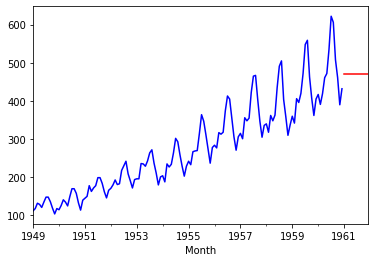

In [30]:
#Plot Data
Time_Series['#Passengers'].plot(color = 'Blue')
forecast.plot(color='Red')

In [31]:
#2 Holt Winter Exponential Smoothing
from statsmodels.tsa.api import ExponentialSmoothing
Simple = ExponentialSmoothing(Time_Series,seasonal_periods = 6, trend = 'add' , seasonal = 'add').fit(use_boxcox = True)

C:\Users\Vaibhav Banga\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Vaibhav Banga\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Vaibhav Banga\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\Vaibhav Banga\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [32]:
forecast = Simple.forecast(12)

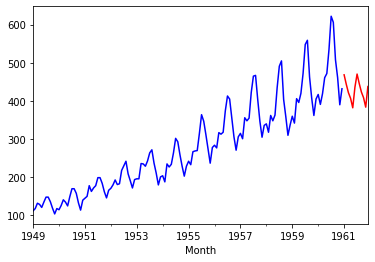

In [33]:
Time_Series['#Passengers'].plot(color = 'Blue')
forecast.plot(color = 'Red')

In [36]:
#3 ARIMA MODEL
from statsmodels.tsa.arima_model import ARIMA
#Fit the Model by defining p,d,q
#P = 5
#d= 1
#q(MA) = 0 
model = ARIMA(Time_Series,(5,1,0))
model_fit = model.fit(disp = 0)

C:\Users\Vaibhav Banga\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Vaibhav Banga\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [65]:
X=Time_Series['#Passengers'].values
X

array([112, 118, 132, 129, 121, 135, 148, 148, 136, 119, 104, 118, 115,
       126, 141, 135, 125, 149, 170, 170, 158, 133, 114, 140, 145, 150,
       178, 163, 172, 178, 199, 199, 184, 162, 146, 166, 171, 180, 193,
       181, 183, 218, 230, 242, 209, 191, 172, 194, 196, 196, 236, 235,
       229, 243, 264, 272, 237, 211, 180, 201, 204, 188, 235, 227, 234,
       264, 302, 293, 259, 229, 203, 229, 242, 233, 267, 269, 270, 315,
       364, 347, 312, 274, 237, 278, 284, 277, 317, 313, 318, 374, 413,
       405, 355, 306, 271, 306, 315, 301, 356, 348, 355, 422, 465, 467,
       404, 347, 305, 336, 340, 318, 362, 348, 363, 435, 491, 505, 404,
       359, 310, 337, 360, 342, 406, 396, 420, 472, 548, 559, 463, 407,
       362, 405, 417, 391, 419, 461, 472, 535, 622, 606, 508, 461, 390,
       432], dtype=int64)

In [66]:
len(X)

144

In [67]:
len(X)*0.75

108.0

In [80]:
train = x[0:108]
test = x[108:]

In [69]:
#from sklearn.model_selection import train_test_split
#train,test = train_test_split(x[0:108],x[108:],test_size = 0.25,random_state = 0)

In [73]:
history = [x for x in train]
prediction = list()

for t in range(len(test)):
    #Prediction
    model = ARIMA(history,(5,1,0))
    model_fit = model.fit(disp = 0)
    forecast = model_fit.forecast()
    y_pred = forecast[0]
    prediction.append(y_pred)
    #Actual
    obs = test[t]
    history.append(obs)
    print(obs,y_pred)

340 [383.34904667]
318 [351.78128575]
362 [322.73934256]
348 [372.88441427]
363 [333.33245973]
435 [382.49344325]
491 [435.78778595]
505 [502.00627297]
404 [497.70195673]
359 [347.1301488]
310 [364.77733425]
337 [307.29744384]
360 [394.59500137]
342 [377.73120967]
406 [343.94594614]
396 [419.24802946]
420 [377.26906857]
472 [433.78416512]
548 [462.00891412]
559 [569.72776595]
463 [544.07484667]
407 [418.3504484]
362 [395.54346145]
405 [369.15412687]
417 [462.55625318]
391 [430.29440869]
419 [386.85435731]
461 [420.18551471]
472 [470.78832081]
535 [474.01421786]
622 [543.79505249]
606 [632.76048041]
508 [582.87826138]
461 [464.22944811]
390 [454.92080919]
432 [387.99463339]


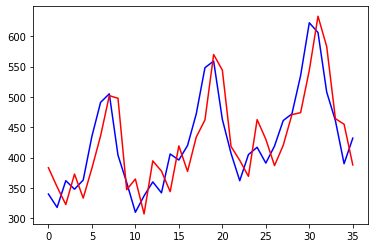

In [79]:
plt.plot(test,color = 'Blue')
plt.plot(prediction,color = 'Red')